# Домашняя работа 2

**Срок сдачи:** 23 октября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем формате: <br\>
** [ИАД] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Домашняя-работа-2" data-toc-modified-id="Домашняя-работа-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа 2</a></div><div class="lev2 toc-item"><a href="#Работа-с-данными-(4-балла)" data-toc-modified-id="Работа-с-данными-(4-балла)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Работа с данными (4 балла)</a></div><div class="lev2 toc-item"><a href="#Классификация-(6-баллов)" data-toc-modified-id="Классификация-(6-баллов)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Классификация (6 баллов)</a></div><div class="lev3 toc-item"><a href="#Предписания" data-toc-modified-id="Предписания-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Предписания</a></div><div class="lev3 toc-item"><a href="#Задание" data-toc-modified-id="Задание-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Задание</a></div>

In [688]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

Прочтите статью ["USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION"](https://www.dropbox.com/s/ww4h9ivnkbyy9xw/STUDENT%20ALCOHOL%20CONSUMPTION%20%281%29.pdf?dl=0).<br\>
Загрузите [датасет](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#), используемый в статье и выполните следующие задания:

## Работа с данными (4 балла)
1. Приведите описание признаков датасета на русском языке с указанием типа данных (2 балла)
2. Описание предобработки данных (2 балла)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (1 балл)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значением (1 балл)

In [691]:
import zipfile

In [692]:
student_mat_data = pd.read_csv(zipfile.ZipFile('student.zip').open('student-mat.csv'), delimiter=';')
student_mat_data.shape

(395, 33)

In [693]:
student_por_data = pd.read_csv(zipfile.ZipFile('student.zip').open('student-por.csv'), delimiter=';')
student_por_data.shape

(649, 33)

In [694]:
data = pd.concat([student_mat_data, student_por_data], ignore_index=True)
data.shape

(1044, 33)

In [695]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [696]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

*Уберем некоторые признаки в соответствии с вышеприведенной статьей:*

In [697]:
data = data.drop(['famsize', 'Fedu', 'Fjob', 'reason', 'guardian', 'famrel'], axis=1)
data.columns

Index(['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Mjob',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

*Из двух столбцов Dalc и Walc сделаем один alc по формуле из той же статьи:*

$$
alc = \frac{Walc \times 2 + Dalc \times 5}{7}
$$

In [698]:
data.Dalc[-5:]

1039    1
1040    1
1041    1
1042    3
1043    3
Name: Dalc, dtype: int64

In [699]:
data.Walc[-5:]

1039    2
1040    1
1041    1
1042    4
1043    4
Name: Walc, dtype: int64

In [700]:
alc = ((data.Walc * 2 + data.Dalc * 5) / 7)
alc[-5:]

1039    1.285714
1040    1.000000
1041    1.000000
1042    3.285714
1043    3.285714
dtype: float64

*Мы будем решать задачу бинарной классификации, поэтому, опять воспользовавшись статьей, преобразуем столбец alc в новый столбец Alc, причем значение 0 в столбце Alc будет соответствовать значению меньше 3 в столбце alc, 1 - не меньше:*

In [701]:
Alc = pd.DataFrame({'Alc': (alc >= 3).astype(int)})
Alc[-5:]

,Alc
1039,0
1040,0
1041,0
1042,1
1043,1


*Наконец можно убрать столбцы Walc и Dalc из исходной таблицы и добавить новый столбец Alc:*

In [702]:
data = data.join(Alc)
data = data.drop(['Walc', 'Dalc'], axis=1)
data.columns

Index(['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Mjob',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'freetime',
       'goout', 'health', 'absences', 'G1', 'G2', 'G3', 'Alc'],
      dtype='object')

*В соответствии с таблицей 1 на странице 3 статьи можно привести следующее описание признаков:*

- sex: пол студента (бинарный: женский или мужской)
- age: возраст студента (числовой: от 15 до 22)
- school: школа студента (бинарный: Gabriel Pereira или Mousinho da Silveira)
- address: тип домашнего адреса студента (бинарный: городской или сельский)
- Pstatus: тип отношений родителей (бинарный: живут вместе или раздельно)
- Medu: образование матери (числовой: 0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднее специальное или 4 – высшее)
- Mjob: работа матери (номинальный: учитель, связанная со здоровьем, городская служба (например, в администрации или в полиции), дома или другое)
- traveltime: время от дома до школы (числовой: 1 - меньше 15 минут, 2 - от 15 до 30 минут, 3 - от 30 минут до 1 часа или 4 - больше 1 часа)
- studytime: количество часов обучения в неделю (числовой: 1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов или 4 - больше 10 часов)
- failures: количество ранее не сданных предметов (числовой: 1 - один предмет, 2 - два предмета или 4 - в ином случае)
- schoolsup: дополнительные занятия (бинарный: да или нет)
- famsup: помощь семьи прри выполнении учебных заданий (бинарный: да или нет)
- activities: внеучебная активность (бинарный: да или нет)
- paidclass: дополнительные платные занятия (бинарный: да или нет)
- nursery: посещение детского сада ранее (бинарный: да или нет)
- higher: желание получить высшее образование (бинарный: да или нет)
- romantic: наличие романтических отношений (бинарный: да или нет)
- freetime: свободное время после школы (числовой: от 1 - очень мало - до 5 - очень много)
- goout: время, проведенное на гуляниях с друзьями (числовой: от 1 - очень мало - до 5 - очень много)
- health: текущее состояние здоровья (числовой: от 1 - очень плохое - до 5 - очень хорошее)
- absences: количество школьных пропусков (числовой: от 0 до 93)
- G1: оценка за первый семестр (числовой: от 0 до 20)
- G2: оценка за второй семестр (числовой: от 0 до 20)
- G3: итоговая оценка (числовой: от 0 до 20)
- Alc: наличие алкоголизма (бинарный: да или нет)

*Проверим наличие пропусков:*

In [703]:
data.isnull().any().any()

False

*Как видно, пропусков в данных нет. Ну и хорошо.*

*Из описания признаков видно, что у нас всего один номинальный признак: Mjob. Посмотрим, какие значения он принимает, и в соответствии с этим разобьем его на бинарные признаки:*

In [704]:
data.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [705]:
# Переименуем признак health, отвечающий за текущее состояние здоровья, дабы избежать путаницы
data = data.rename(columns={'health':'health_stud'})
data.columns

Index(['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Mjob',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'freetime',
       'goout', 'health_stud', 'absences', 'G1', 'G2', 'G3', 'Alc'],
      dtype='object')

In [706]:
data.Mjob[:5]

0    at_home
1    at_home
2    at_home
3     health
4      other
Name: Mjob, dtype: object

In [707]:
Mjob_multiple = pd.get_dummies(data.Mjob)
Mjob_multiple[:5]

,at_home,health,other,services,teacher
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [708]:
data = data.drop(['Mjob'], axis=1)
data = pd.concat([data, Mjob_multiple], axis=1)
data.columns

Index(['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'freetime', 'goout',
       'health_stud', 'absences', 'G1', 'G2', 'G3', 'Alc', 'at_home', 'health',
       'other', 'services', 'teacher'],
      dtype='object')

*Теперь переведем значения бинарных признаков в 0 и 1, воспользовавшись тем, что мы уже обработали единственный номинальный признак, и остались только бинарные и числовые:*

In [709]:
binary_features = [feature for feature in data.columns if data[feature].dtype.name == 'object']
binary_features

['school',
 'sex',
 'address',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [710]:
data[binary_features].describe()

,school,sex,address,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,GP,F,U,T,no,yes,no,no,yes,yes,yes,no
freq,772,591,759,923,925,640,824,528,835,955,827,673


In [711]:
for feature in binary_features:
    top_value = data[binary_features].describe()[feature]['top']
    data.loc[data[feature] != top_value, feature] = 0
    data.loc[data[feature] == top_value, feature] = 1
data[binary_features].describe()

,school,sex,address,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,1,1,1,1,1,1,1,1,1,1,1,1
freq,772,591,759,923,925,640,824,528,835,955,827,673


## Классификация (6 баллов)

### Предписания
- Используйте accuracy как основную меру качества
- Классы в задаче несбалансированные. Для корректной кросс-валидации используйте стратифицированный способ разбиения на фолды [Stratified K-fold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

### Задание
1. Задайте RANDOM_SEED и случайным образом разделите выборку на обучающую и контрольную в пропорции 80/20. Этот же RANDOM_SEED используйте при кросс-валидации (0.5 балла)
2. Random Forest (2 балла)
    * В статье описано использование Random Forest для предсказания важности фактором вляющих на потребление алкоголя.<br\>
    * Повторите эксперимент с использованием [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры с помощью кросс-валидации. (1 балл)<br\>
    * Изобразите аналогичную таблицу важности признаков для наилучшей настройки метода (значения могут отличаться). (0.5 балла)<br\>
    * Укажите значение accuracy для пяти наилучших настроек метода на контрольной выборке. (0.5 балла)<br\>

3. GradientBoosting (2 балла)
    * Обучите [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)<br\>
    * Изобразите таблицу важности признаков для наилучшей настройки метода. Отличается ли она от таблицы метода RandomForest. Почему? (1 балл)<br\>
    * Укажите значение accuracy для пяти наилучших настроек метода. (0.5 балла)<br\>

4. AdaBoost (1 балл)
    * Обучите [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)<br\>
    * Укажите значение accuracy для пяти наилучших настроек метода. (0.5 балла)<br\>

5. Какой из классификаторов оказался лучше? (0.5 балла)

In [712]:
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedKFold

# 1 Разбиение выборки

In [713]:
from sklearn.cross_validation import train_test_split

In [714]:
RANDOM_SEED = np.random.seed(13)
train, test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

In [715]:
train.shape

(835, 30)

In [716]:
test.shape

(209, 30)

In [717]:
train.head()

,school,sex,age,address,Pstatus,Medu,traveltime,studytime,failures,schoolsup,...,absences,G1,G2,G3,Alc,at_home,health,other,services,teacher
860,0,1,18,1,1,1,1,2,1,1,...,9,9,8,8,0,0,0,1,0,0
269,1,1,18,0,1,2,2,2,0,1,...,0,6,0,0,0,0,0,1,0,0
581,1,0,17,1,1,4,1,2,0,1,...,0,11,9,10,0,0,0,0,0,1
775,1,1,17,1,1,4,1,3,0,1,...,0,13,12,13,0,0,0,0,0,1
669,1,1,17,1,1,1,1,2,0,0,...,10,10,9,10,0,1,0,0,0,0


In [718]:
test.head()

,school,sex,age,address,Pstatus,Medu,traveltime,studytime,failures,schoolsup,...,absences,G1,G2,G3,Alc,at_home,health,other,services,teacher
640,1,0,17,0,1,2,2,2,0,1,...,0,12,13,13,0,0,0,1,0,0
722,1,1,18,0,1,1,2,4,0,1,...,2,17,17,18,0,1,0,0,0,0
914,0,0,16,0,1,2,2,2,0,1,...,0,8,7,0,0,0,0,1,0,0
731,1,0,18,1,1,4,1,2,0,1,...,2,15,16,16,0,0,0,0,0,1
688,1,1,18,1,1,1,1,3,0,1,...,4,11,12,14,0,0,0,1,0,0


In [719]:
X_train = train.drop(['Alc'], axis=1)
X_test = test.drop(['Alc'], axis=1)
y_train = train.Alc.values
y_test = test.Alc.values

# 2 Random Forest

In [720]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

In [721]:
n_estimators_array = [5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200, 250, 300, 350, 400]
rf = RandomForestClassifier(random_state = RANDOM_SEED)
grid_rf = GridSearchCV(rf, param_grid={'n_estimators': n_estimators_array}, scoring='accuracy',
                    cv=StratifiedKFold(y_train, 5, random_state=RANDOM_SEED))
grid_rf.fit(X_train, y_train)

best_cv_err = 1 - grid_rf.best_score_
best_n_estimators = grid_rf.best_estimator_.n_estimators
print (best_cv_err, best_n_estimators)

0.101796407186 15


In [722]:
rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [723]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances:")
for feature, index in enumerate(indices):
    print("{:d}. '{:s}' ({:.4f})".format(feature + 1, train.columns[index], importances[index]))

Feature importances:
1. 'absences' (0.0826)
2. 'age' (0.0742)
3. 'G1' (0.0701)
4. 'goout' (0.0653)
5. 'G3' (0.0597)
6. 'freetime' (0.0575)
7. 'G2' (0.0520)
8. 'sex' (0.0504)
9. 'traveltime' (0.0494)
10. 'Medu' (0.0447)
11. 'health_stud' (0.0438)
12. 'studytime' (0.0360)
13. 'address' (0.0335)
14. 'romantic' (0.0295)
15. 'failures' (0.0263)
16. 'nursery' (0.0217)
17. 'famsup' (0.0216)
18. 'activities' (0.0213)
19. 'Alc' (0.0194)
20. 'other' (0.0186)
21. 'paid' (0.0180)
22. 'health' (0.0166)
23. 'higher' (0.0159)
24. 'services' (0.0147)
25. 'school' (0.0126)
26. 'Pstatus' (0.0124)
27. 'internet' (0.0123)
28. 'at_home' (0.0117)
29. 'schoolsup' (0.0083)


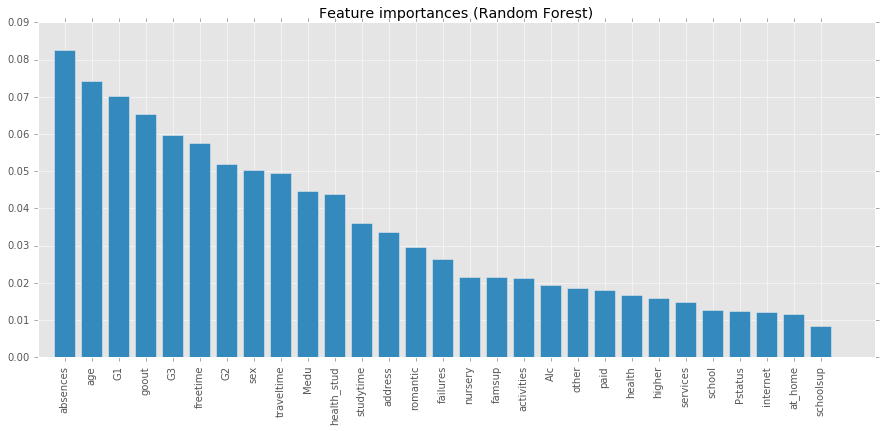

In [724]:
plt.title("Feature importances (Random Forest)")
plt.bar(np.arange(len(train.columns) - 1), importances[indices], align='center')
plt.xticks(range(len(train.columns) - 1), train.columns[indices[:len(train.columns)]], rotation=90)
plt.xlim([-1, len(train.columns)])
plt.show()

In [725]:
grid_rf.grid_scores_

[mean: 0.87784, std: 0.00944, params: {'n_estimators': 5},
 mean: 0.89581, std: 0.00624, params: {'n_estimators': 10},
 mean: 0.89820, std: 0.00551, params: {'n_estimators': 15},
 mean: 0.88263, std: 0.01071, params: {'n_estimators': 20},
 mean: 0.89341, std: 0.00450, params: {'n_estimators': 25},
 mean: 0.88743, std: 0.00676, params: {'n_estimators': 30},
 mean: 0.89102, std: 0.00700, params: {'n_estimators': 40},
 mean: 0.89102, std: 0.00559, params: {'n_estimators': 50},
 mean: 0.89222, std: 0.00537, params: {'n_estimators': 75},
 mean: 0.88982, std: 0.00598, params: {'n_estimators': 100},
 mean: 0.89341, std: 0.01014, params: {'n_estimators': 150},
 mean: 0.89102, std: 0.00450, params: {'n_estimators': 200},
 mean: 0.89461, std: 0.00956, params: {'n_estimators': 250},
 mean: 0.88862, std: 0.00598, params: {'n_estimators': 300},
 mean: 0.89222, std: 0.00359, params: {'n_estimators': 350},
 mean: 0.88982, std: 0.00708, params: {'n_estimators': 400}]

In [726]:
sorted(grid_rf.grid_scores_, key=lambda x: x[1], reverse=True)

[mean: 0.89820, std: 0.00551, params: {'n_estimators': 15},
 mean: 0.89581, std: 0.00624, params: {'n_estimators': 10},
 mean: 0.89461, std: 0.00956, params: {'n_estimators': 250},
 mean: 0.89341, std: 0.00450, params: {'n_estimators': 25},
 mean: 0.89341, std: 0.01014, params: {'n_estimators': 150},
 mean: 0.89222, std: 0.00537, params: {'n_estimators': 75},
 mean: 0.89222, std: 0.00359, params: {'n_estimators': 350},
 mean: 0.89102, std: 0.00700, params: {'n_estimators': 40},
 mean: 0.89102, std: 0.00559, params: {'n_estimators': 50},
 mean: 0.89102, std: 0.00450, params: {'n_estimators': 200},
 mean: 0.88982, std: 0.00598, params: {'n_estimators': 100},
 mean: 0.88982, std: 0.00708, params: {'n_estimators': 400},
 mean: 0.88862, std: 0.00598, params: {'n_estimators': 300},
 mean: 0.88743, std: 0.00676, params: {'n_estimators': 30},
 mean: 0.88263, std: 0.01071, params: {'n_estimators': 20},
 mean: 0.87784, std: 0.00944, params: {'n_estimators': 5}]

In [727]:
best_parameters = [15, 10, 250, 25, 150]
for parameter in best_parameters:
    rf = RandomForestClassifier(n_estimators=parameter, random_state=RANDOM_SEED)
    rf.fit(X_train, y_train)
    print(parameter, accuracy_score(y_test, rf.predict(X_test)))

15 0.904306220096
10 0.913875598086
250 0.904306220096
25 0.909090909091
150 0.904306220096


# 3 Gradient Boosting

In [728]:
from sklearn.ensemble import GradientBoostingClassifier

In [730]:
n_estimators_array = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120]
gbt = GradientBoostingClassifier(random_state = RANDOM_SEED)
grid_gbt = GridSearchCV(gbt, param_grid={'n_estimators': n_estimators_array}, scoring='accuracy',
                    cv=StratifiedKFold(y_train, 5, random_state=RANDOM_SEED))
grid_gbt.fit(X_train, y_train)

best_cv_err = 1 - grid_gbt.best_score_
best_n_estimators = grid_gbt.best_estimator_.n_estimators
print (best_cv_err, best_n_estimators)

0.108982035928 35


In [731]:
gbt = GradientBoostingClassifier(n_estimators=best_n_estimators, random_state=RANDOM_SEED)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=35,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [732]:
importances = gbt.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances:")
for feature, index in enumerate(indices):
    print("{:d}. '{:s}' ({:.4f})".format(feature + 1, train.columns[index], importances[index]))

Feature importances:
1. 'absences' (0.1778)
2. 'G1' (0.1303)
3. 'goout' (0.1164)
4. 'age' (0.1000)
5. 'sex' (0.0951)
6. 'studytime' (0.0811)
7. 'freetime' (0.0704)
8. 'G3' (0.0594)
9. 'Medu' (0.0283)
10. 'G2' (0.0190)
11. 'higher' (0.0181)
12. 'school' (0.0155)
13. 'traveltime' (0.0125)
14. 'health_stud' (0.0109)
15. 'schoolsup' (0.0106)
16. 'Alc' (0.0103)
17. 'failures' (0.0098)
18. 'services' (0.0097)
19. 'address' (0.0079)
20. 'health' (0.0075)
21. 'internet' (0.0036)
22. 'other' (0.0028)
23. 'activities' (0.0014)
24. 'nursery' (0.0012)
25. 'romantic' (0.0004)
26. 'famsup' (0.0000)
27. 'paid' (0.0000)
28. 'Pstatus' (0.0000)
29. 'at_home' (0.0000)


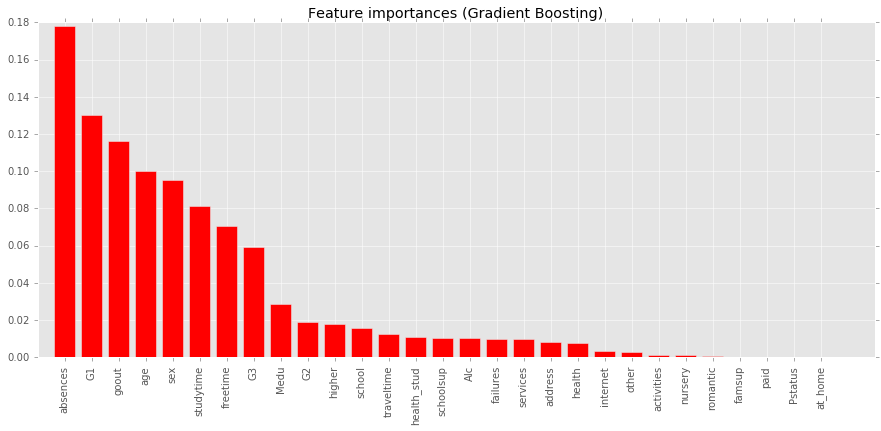

In [733]:
plt.title("Feature importances (Gradient Boosting)")
plt.bar(np.arange(len(train.columns) - 1), importances[indices], align='center', color='red')
plt.xticks(range(len(train.columns) - 1), train.columns[indices[:len(train.columns)]], rotation=90)
plt.xlim([-1, len(train.columns)])
plt.show()

*Видна разница между таблицами и диаграммами важности признаков для Random Forest и Gradient Boosting - в первом случае коэффициенты важности убывают довольно плавно, а во втором случае резко, а также некоторые признаки находятся на других местах. Возможно, разница в плавности возникает из-за того, что, в отличие от случайного леса, деревья при градиентном бустинге строятся итеративно, и алгоритм, выделяя и отбрасывая какие-то признаки на отдельном этапе, "подстраивается" далее под их важность (здесь имеется в виду, что если в каком-то дереве часто используется в разбиении вершин некоторый признак, то, в следующих деревьях он, вероятно, тоже будет часто использоваться). В случайном лесе же все деревья строятся параллельно, поэтому дисбаланс в важности признаков сглаживается. Ну а то, что признаки будут стоять в одном алгоритме на одних местах, а в другом алгоритме - на других, очевидно в силу разной структуры алгоритмов.*

In [734]:
grid_gbt.grid_scores_

[mean: 0.88982, std: 0.00296, params: {'n_estimators': 20},
 mean: 0.88743, std: 0.00467, params: {'n_estimators': 25},
 mean: 0.88982, std: 0.00813, params: {'n_estimators': 30},
 mean: 0.89102, std: 0.01154, params: {'n_estimators': 35},
 mean: 0.88982, std: 0.01104, params: {'n_estimators': 40},
 mean: 0.88982, std: 0.01104, params: {'n_estimators': 45},
 mean: 0.88743, std: 0.01162, params: {'n_estimators': 50},
 mean: 0.88743, std: 0.01162, params: {'n_estimators': 55},
 mean: 0.88623, std: 0.01081, params: {'n_estimators': 60},
 mean: 0.88623, std: 0.01063, params: {'n_estimators': 65},
 mean: 0.88503, std: 0.01162, params: {'n_estimators': 70},
 mean: 0.88503, std: 0.01162, params: {'n_estimators': 75},
 mean: 0.88383, std: 0.01299, params: {'n_estimators': 80},
 mean: 0.88383, std: 0.00974, params: {'n_estimators': 85},
 mean: 0.88383, std: 0.01112, params: {'n_estimators': 90},
 mean: 0.88503, std: 0.01162, params: {'n_estimators': 95},
 mean: 0.88263, std: 0.01112, params: {'

In [735]:
sorted(grid_gbt.grid_scores_, key=lambda x: x[1], reverse=True)

[mean: 0.89102, std: 0.01154, params: {'n_estimators': 35},
 mean: 0.88982, std: 0.00296, params: {'n_estimators': 20},
 mean: 0.88982, std: 0.00813, params: {'n_estimators': 30},
 mean: 0.88982, std: 0.01104, params: {'n_estimators': 40},
 mean: 0.88982, std: 0.01104, params: {'n_estimators': 45},
 mean: 0.88743, std: 0.00467, params: {'n_estimators': 25},
 mean: 0.88743, std: 0.01162, params: {'n_estimators': 50},
 mean: 0.88743, std: 0.01162, params: {'n_estimators': 55},
 mean: 0.88623, std: 0.01081, params: {'n_estimators': 60},
 mean: 0.88623, std: 0.01063, params: {'n_estimators': 65},
 mean: 0.88503, std: 0.01162, params: {'n_estimators': 70},
 mean: 0.88503, std: 0.01162, params: {'n_estimators': 75},
 mean: 0.88503, std: 0.01162, params: {'n_estimators': 95},
 mean: 0.88383, std: 0.01299, params: {'n_estimators': 80},
 mean: 0.88383, std: 0.00974, params: {'n_estimators': 85},
 mean: 0.88383, std: 0.01112, params: {'n_estimators': 90},
 mean: 0.88383, std: 0.01242, params: {'

In [737]:
best_parameters = [35, 20, 30, 40, 45]
for parameter in best_parameters:
    gbt = GradientBoostingClassifier(n_estimators=parameter, random_state=RANDOM_SEED)
    gbt.fit(X_train, y_train)
    print(parameter, accuracy_score(y_test, gbt.predict(X_test)))

35 0.894736842105
20 0.894736842105
30 0.894736842105
40 0.8995215311
45 0.8995215311


# 4 AdaBoost

In [738]:
from sklearn.ensemble import AdaBoostClassifier

In [740]:
n_estimators_array = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120]
ada = AdaBoostClassifier(random_state = RANDOM_SEED)
grid_ada = GridSearchCV(ada, param_grid={'n_estimators': n_estimators_array}, scoring='accuracy',
                    cv=StratifiedKFold(y_train, 5, random_state=RANDOM_SEED))
grid_ada.fit(X_train, y_train)

best_cv_err = 1 - grid_ada.best_score_
best_n_estimators = grid_ada.best_estimator_.n_estimators
print (best_cv_err, best_n_estimators)

0.119760479042 40


In [741]:
grid_ada.grid_scores_

[mean: 0.87904, std: 0.00714, params: {'n_estimators': 20},
 mean: 0.87665, std: 0.01120, params: {'n_estimators': 25},
 mean: 0.87665, std: 0.00898, params: {'n_estimators': 30},
 mean: 0.87784, std: 0.01398, params: {'n_estimators': 35},
 mean: 0.88024, std: 0.01265, params: {'n_estimators': 40},
 mean: 0.87665, std: 0.01346, params: {'n_estimators': 45},
 mean: 0.87904, std: 0.01410, params: {'n_estimators': 50},
 mean: 0.87784, std: 0.01112, params: {'n_estimators': 55},
 mean: 0.87186, std: 0.01082, params: {'n_estimators': 60},
 mean: 0.87305, std: 0.00921, params: {'n_estimators': 65},
 mean: 0.87066, std: 0.01234, params: {'n_estimators': 70},
 mean: 0.87186, std: 0.01002, params: {'n_estimators': 75},
 mean: 0.86826, std: 0.01329, params: {'n_estimators': 80},
 mean: 0.86826, std: 0.01024, params: {'n_estimators': 85},
 mean: 0.86587, std: 0.01121, params: {'n_estimators': 90},
 mean: 0.86347, std: 0.00960, params: {'n_estimators': 95},
 mean: 0.86347, std: 0.00960, params: {'

In [742]:
sorted(grid_ada.grid_scores_, key=lambda x: x[1], reverse=True)

[mean: 0.88024, std: 0.01265, params: {'n_estimators': 40},
 mean: 0.87904, std: 0.00714, params: {'n_estimators': 20},
 mean: 0.87904, std: 0.01410, params: {'n_estimators': 50},
 mean: 0.87784, std: 0.01398, params: {'n_estimators': 35},
 mean: 0.87784, std: 0.01112, params: {'n_estimators': 55},
 mean: 0.87665, std: 0.01120, params: {'n_estimators': 25},
 mean: 0.87665, std: 0.00898, params: {'n_estimators': 30},
 mean: 0.87665, std: 0.01346, params: {'n_estimators': 45},
 mean: 0.87305, std: 0.00921, params: {'n_estimators': 65},
 mean: 0.87186, std: 0.01082, params: {'n_estimators': 60},
 mean: 0.87186, std: 0.01002, params: {'n_estimators': 75},
 mean: 0.87066, std: 0.01234, params: {'n_estimators': 70},
 mean: 0.86826, std: 0.01329, params: {'n_estimators': 80},
 mean: 0.86826, std: 0.01024, params: {'n_estimators': 85},
 mean: 0.86587, std: 0.01121, params: {'n_estimators': 90},
 mean: 0.86467, std: 0.00898, params: {'n_estimators': 110},
 mean: 0.86347, std: 0.00960, params: {

In [743]:
best_parameters = [40, 20, 50, 35, 55]
for parameter in best_parameters:
    ada = AdaBoostClassifier(n_estimators=parameter, random_state=RANDOM_SEED)
    ada.fit(X_train, y_train)
    print(parameter, accuracy_score(y_test, ada.predict(X_test)))

40 0.913875598086
20 0.904306220096
50 0.913875598086
35 0.913875598086
55 0.909090909091


# 5 Какой из классификаторов оказался лучше?

Видно, что лучше всех рассмотренных классификаторов с задачей справился AdaBoost с параметром n_estimators=40: accuracy на тестовой выборке составило 0.914.